In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
print("Imported Libraries")

Imported Libraries


In [7]:
dataset_path = f'./dataset'

In [8]:
def data_loader(file_name, labelscheck):
    if labelscheck:
        data_list = open(f'{dataset_path}/{file_name}', 'r').read().split("\n")
    else:
        data_list = open(f'{dataset_path}/{file_name}', 'r', encoding="utf-8").read().split("\n")
    return data_list

In [9]:
print(os.listdir(dataset_path))

['train_labels.txt', 'val_text.txt', 'val_labels.txt', 'test_labels.txt', 'train_text.txt', 'mapping.txt', 'test_text.txt']


In [10]:
train = pd.DataFrame({'text':data_loader('train_text.txt', False),'labels': data_loader('train_labels.txt', True)}, dtype='string')
train.head()

,text,labels
0,@user nice new signage. Are you not concerned ...,0
1,A woman who you fucked multiple times saying y...,1
2,@user @user real talk do you have eyes or were...,1
3,your girlfriend lookin at me like a groupie in...,1
4,Hysterical woman like @user,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9001 non-null   string
 1   labels  9001 non-null   string
dtypes: string(2)
memory usage: 140.8 KB


In [12]:
train.describe

<bound method NDFrame.describe of                                                    text labels
0     @user nice new signage. Are you not concerned ...      0
1     A woman who you fucked multiple times saying y...      1
2     @user @user real talk do you have eyes or were...      1
3     your girlfriend lookin at me like a groupie in...      1
4                          Hysterical woman like @user       0
...                                                 ...    ...
8996  @user Good Luck @user More Americans #WalkAway...      0
8997            Bitch you can't keep up so stop trying       1
8998  @user @user @user @user @user @user Japan is a...      0
8999  @user hi Best l see someone fucking girl comme...      1
9000                                                          

[9001 rows x 2 columns]>

In [13]:
train.isnull().sum()

text      0
labels    0
dtype: int64

In [14]:
print(train[train['labels'] == ''].index)
print(train[train['text'] == ''].index)

Int64Index([9000], dtype='int64')
Int64Index([1467, 1982, 3843, 6643, 6791, 7114, 8218, 9000], dtype='int64')


In [15]:
train.replace("", np.nan, inplace=True)
train.dropna(subset=['labels', 'text'], inplace=True)

In [16]:
train.dtypes

text      string
labels    string
dtype: object

In [17]:
train.tail()

,text,labels
8995,Oooohhhh bitch didn't even listen to the dead ...,0
8996,@user Good Luck @user More Americans #WalkAway...,0
8997,Bitch you can't keep up so stop trying,1
8998,@user @user @user @user @user @user Japan is a...,0
8999,@user hi Best l see someone fucking girl comme...,1


In [18]:
train['labels'] = train['labels'].astype(int)
train.dtypes

text      string
labels     int64
dtype: object

In [19]:
train['labels'].unique()

array([0, 1])

In [20]:
mapping = pd.read_csv(open(f'{dataset_path}/mapping.txt', 'r', encoding='utf-8'), index_col = 0, header = None, delimiter = '\t')
mapping.columns = ['labels']
mapping.head()

,labels
0,
0,not-offensive
1,offensive


In [21]:
mapping.dtypes

labels    object
dtype: object

In [22]:
mapping['labels'].to_dict()

{0: 'not-offensive', 1: 'offensive'}

In [23]:
train['label_text'] = train['labels'].map(mapping['labels'].to_dict())
labelcounts = (train['label_text'].value_counts()/len(train['labels']))*100

In [24]:
train

,text,labels,label_text
0,@user nice new signage. Are you not concerned ...,0,not-offensive
1,A woman who you fucked multiple times saying y...,1,offensive
2,@user @user real talk do you have eyes or were...,1,offensive
3,your girlfriend lookin at me like a groupie in...,1,offensive
4,Hysterical woman like @user,0,not-offensive
...,...,...,...
8995,Oooohhhh bitch didn't even listen to the dead ...,0,not-offensive
8996,@user Good Luck @user More Americans #WalkAway...,0,not-offensive
8997,Bitch you can't keep up so stop trying,1,offensive
8998,@user @user @user @user @user @user Japan is a...,0,not-offensive


In [25]:
labelcounts = (train['label_text'].value_counts()/len(train['labels']))*100
labelcounts

not-offensive    57.933949
offensive        42.066051
Name: label_text, dtype: float64

/home/samvit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Labels Distribution')

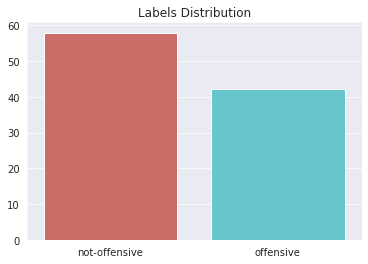

In [26]:
sns.set_style('darkgrid')
labelperc = sns.barplot(labelcounts.index, labelcounts.values, palette = 'hls')
labelperc.set_title("Labels Distribution")

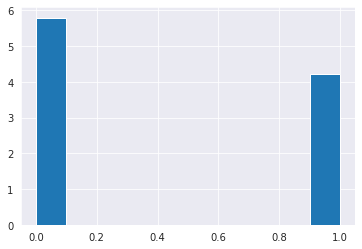

In [27]:
plt.hist(train['labels'], density=True)
plt.show()

In [28]:
train_subset = train['text'].to_list()[:60]
len(train_subset)

60

In [29]:
train_subset[:30]

['@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… ',
 'A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎 ',
 '@user @user real talk do you have eyes or were they gouged out by a rapefugee? ',
 'your girlfriend lookin at me like a groupie in this bitch! ',
 'Hysterical woman like @user ',
 'Me flirting- So tell me about your father... ',
 'The Philippine Catholic bishops\' work for migrant workers should focus on families who are "paying the great... ',
 "I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I'm done with you dude that's why I dumped your ass cause your a lieing 😂😡 bitch ",
 'When cuffin season is finally over ',
 'Send home migrants not in need of protection, Peter Dutton tells UN, HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS ? WHY DONT YOU GO AND ROUND ALL THEM UP ?  ',
 'Cory Booker and Kamala Harr

In [30]:
for text in train_subset:
    for t in text.split(" "):
        if '\\u' in t:
            print(t)

In [31]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        t =  str.replace(t, '\\u2019', "'")
        t =  str.replace(t, '\u002c', ",")
        new_text.append(t)
    return " ".join(new_text)

In [32]:
print('Raw :', train_subset[12])
print('Cleaned :',preprocess(train_subset[12]))

Raw : Should have let the Libyan Manchester bomber rot in his own country. How many more mass murderers did the Royal Navy import to Britain? How many more terrorists do the NGO's rescue from international waters? #RefugeesNotWelcome 
Cleaned : Should have let the Libyan Manchester bomber rot in his own country. How many more mass murderers did the Royal Navy import to Britain? How many more terrorists do the NGO's rescue from international waters? #RefugeesNotWelcome 


In [33]:
def stop_words(text_list):
    stop = stopwords.words('english')
    newlist = list(map(lambda x: ' '.join([word for word in x.split() if word not in (stop)]), text_list))
    return newlist

In [34]:
stop_words(train_subset[:5])

['@user nice new signage. Are concerned Beatlemania -style hysterical crowds crongregating you…',
 'A woman fucked multiple times saying yo dick small compliment know u hit spot 😎',
 '@user @user real talk eyes gouged rapefugee?',
 'girlfriend lookin like groupie bitch!',
 'Hysterical woman like @user']

In [35]:
def test(s):
    exclude = set(string.punctuation)
    if len(s) > 2:
        t = ''.join(ch for ch in s if ch not in exclude and len(s) > 2)
    else:
        t = s
    return t

In [36]:
train_subset[9:13]

['Send home migrants not in need of protection, Peter Dutton tells UN, HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS ? WHY DONT YOU GO AND ROUND ALL THEM UP ?  ',
 'Cory Booker and Kamala Harris competing for Most Hysterical Woman at the Kavanaugh hearings, Coulter hilariously tweeted.And yes, liberals immediately got triggered on Twitter, saying her joke was offensive. To them we say, suck it up, snowflakes. ',
 "Only that in you which is me can hear what I'm saying. ~Baba Ram Dass ",
 "Should have let the Libyan Manchester bomber rot in his own country. How many more mass murderers did the Royal Navy import to Britain? How many more terrorists do the NGO's rescue from international waters? #RefugeesNotWelcome "]

In [37]:
list(map(test, train_subset[9:13]))

['Send home migrants not in need of protection Peter Dutton tells UN HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS  WHY DONT YOU GO AND ROUND ALL THEM UP   ',
 'Cory Booker and Kamala Harris competing for Most Hysterical Woman at the Kavanaugh hearings Coulter hilariously tweetedAnd yes liberals immediately got triggered on Twitter saying her joke was offensive To them we say suck it up snowflakes ',
 'Only that in you which is me can hear what Im saying Baba Ram Dass ',
 'Should have let the Libyan Manchester bomber rot in his own country How many more mass murderers did the Royal Navy import to Britain How many more terrorists do the NGOs rescue from international waters RefugeesNotWelcome ']

In [38]:
def stemming(text_list):
    ps = PorterStemmer()
    newlist = list(map(lambda x: ' '.join([ps.stem(word) for word in x.split()]), text_list))
    return newlist

In [39]:
#train_subset = stemming(train_subet)
stemming(train_subset[:5])

['@user nice new signage. are you not concern by beatlemania -style hyster crowd crongreg on you…',
 'a woman who you fuck multipl time say yo dick small is a compliment you know u hit that spot 😎',
 '@user @user real talk do you have eye or were they goug out by a rapefugee?',
 'your girlfriend lookin at me like a groupi in thi bitch!',
 'hyster woman like @user']

In [40]:
def lemmatizing(text_list):
    lmtzr = WordNetLemmatizer()
    newlist = list(map(lambda x: ' '.join([lmtzr.lemmatize(word, 'v') for word in x.split()]), text_list))
    return newlist

In [41]:
lemmatizing(train_subset[:5])

['@user nice new signage. Are you not concern by Beatlemania -style hysterical crowd crongregating on you…',
 'A woman who you fuck multiple time say yo dick small be a compliment you know u hit that spot 😎',
 '@user @user real talk do you have eye or be they gouge out by a rapefugee?',
 'your girlfriend lookin at me like a groupie in this bitch!',
 'Hysterical woman like @user']

In [42]:
test_subset = data_loader('test_text.txt', False)[:10]

In [43]:
test_subset

["@user , you are correct that Reid certainly is a weasel. Sadly, we've got our own weasels; @user Sen McConnell & @user .The corrupt Mueller investigation w/be STOPPED if those 3 did their jobs.#MAGA #KAG #POTUS #Trump #NEWS #VoteRed #NoDACA #USA ",
 'Whoever just unfollowed me you a bitch ',
 '@user @user Those People Invaded Us!!! They DO NOT BELING HERE & HAVE NO RIGHTS! Its #AmericaFIRST! Open Your House To Them If Your That IGNORANT! & Yes Im A #Christian Too! #NODACA! ',
 "stop JUDGING bitches by there cover, jus cuz she bad don't mean she's a catch shawdy could be a whore 👀 das opposite of a keeper ",
 'how about i knock heads off and send them gift wrapped to your moms house you dumb raggedy bird bitch ass hoes ',
 '@user @user @user Always #NoDACA.I AM BORN IN #USA AND #USA FIRST. ',
 "@user friends ? that's my BLOOD brother bitch .. he in yo city !! i'm hours away . ill be through there tomo… ",
 "@user @user Muslims attacked US on 9/11, 3000 killed. Subsequently we allowed 

In [44]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import numpy as np

MODEL = f"cardiffnlp/twitter-roberta-base-hate"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

encoded_input = tokenizer(test_subset, max_length=32, padding=True, return_tensors='pt')['input_ids']

2023-06-12 20:14:30.240804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-12 20:14:30.240842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/samvit/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2357: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [45]:
output = model(encoded_input)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.0182,  0.9890],
        [ 0.1830, -0.2092],
        [-0.8242,  0.5331],
        [-0.6603,  0.6526],
        [-0.4094,  0.5363],
        [-0.8487,  0.6315],
        [ 1.0127, -1.0206],
        [-1.2656,  1.0748],
        [-1.3621,  1.3502],
        [-0.2181,  0.1434]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [46]:
output[0]

tensor([[-1.0182,  0.9890],
        [ 0.1830, -0.2092],
        [-0.8242,  0.5331],
        [-0.6603,  0.6526],
        [-0.4094,  0.5363],
        [-0.8487,  0.6315],
        [ 1.0127, -1.0206],
        [-1.2656,  1.0748],
        [-1.3621,  1.3502],
        [-0.2181,  0.1434]], grad_fn=<AddmmBackward0>)

In [47]:
scores = output[0].detach().numpy()
scores

array([[-1.0182284 ,  0.9889734 ],
       [ 0.18295588, -0.20919918],
       [-0.82415605,  0.53306806],
       [-0.66032887,  0.65259045],
       [-0.40936768,  0.53628135],
       [-0.8487104 ,  0.6314905 ],
       [ 1.0126742 , -1.020614  ],
       [-1.2655513 ,  1.0747603 ],
       [-1.362078  ,  1.3501619 ],
       [-0.218055  ,  0.14335416]], dtype=float32)

In [48]:
scores_soft = softmax(scores)
scores_soft

array([[0.01351882, 0.10061334],
       [0.04493726, 0.03035959],
       [0.01641434, 0.06377617],
       [0.01933627, 0.0718731 ],
       [0.02485214, 0.06398144],
       [0.0160162 , 0.07037245],
       [0.10302645, 0.01348661],
       [0.0105567 , 0.10962571],
       [0.00958533, 0.14438356],
       [0.03009191, 0.04319245]], dtype=float32)

In [49]:
predicted_labels = []
for scores in scores_soft:
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    predicted_labels.append(ranking[0])

In [50]:
predicted_labels

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

In [51]:
test_df = pd.DataFrame({'text': test_subset, 'predicted_labels': predicted_labels})

In [52]:
test_df['pred_label_text'] = test_df['predicted_labels'].map(mapping['labels'].to_dict())

In [53]:
test_df

,text,predicted_labels,pred_label_text
0,"@user , you are correct that Reid certainly is...",1,offensive
1,Whoever just unfollowed me you a bitch,0,not-offensive
2,@user @user Those People Invaded Us!!! They DO...,1,offensive
3,"stop JUDGING bitches by there cover, jus cuz s...",1,offensive
4,how about i knock heads off and send them gift...,1,offensive
5,@user @user @user Always #NoDACA.I AM BORN IN ...,1,offensive
6,@user friends ? that's my BLOOD brother bitch ...,0,not-offensive
7,"@user @user Muslims attacked US on 9/11, 3000 ...",1,offensive
8,@user @user Like he ever kept out any threats....,1,offensive
9,#germany deserves to called #cuck/land they al...,1,offensive
